### Tarea 3 Estuardo Funes Solares 20032042

In [1]:
import numpy as np
import imageio as imio
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

Si tienes algún error al ejecutar la celda anterior verifica que tu ambiente de anaconda tenga las librerías necesarias.

# Clasificación con K-nearest neighbors
En este notebook vamos a implementar K-nearest neighbor, nuestro algoritmo va a **clasificar** a que raza pertenece la imagen de un perro, para entrenar nuestro algoritmo vamos a utilizar un set de datos contiene imagenes de 120 razas de perros, en total son 10,222 imagenes.

Data: [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

#### Pre-procesamiento

El pre-procesamiento ya fue realizado y el dataset preparado y esta listo para usarse, para esto se aplico un proceso conocido como "transfer learning" usando la red neuronal "Inception" de Google(tema a cubrirse en proximas clases)  , para esta tarea ignoremos este detalle  y pensemos que se nos da un dataset con features donde cada columna representa una característica de entrada importante,pero no nos interesa conocer los detalles. 

Estas features/características fueron almacenadas en un matriz de numpy.

En esta parte del notebook solo hay que ejecutar las celdas para cargar los datos, estos datos van a servir de entrada para nuestra implementación de K-nearest neighbors con tensorflow.

### Referencias opcionales para transfer learning y "Google inception"
##### Inception
https://www.tensorflow.org/tutorials/image_recognition

https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html

##### Transfer Learning
https://www.datacamp.com/community/tutorials/transfer-learning

In [2]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [3]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array, allow_pickle=True)
training_set_dict['label'] = np.load(training_image_labels_array, allow_pickle=True)
training_set_dict['features'] = np.load(images_inception_features, allow_pickle=True)


#  K-Nearest Neighbors

La data la vamos a manejar en los siguientes 3 arreglos: 

- features    : features de la imagen dadas por google Inception
- labels      : label de la imagen, identifica que raza es
- images_name : nombre de la imgen original, si descargan el dataset con link en la descripcion pueden buscar la imagen original por este nombre.

In [4]:
## Cargamos las features y las labes de cada feature
#features = training_set_dict['features']
x_vals = training_set_dict['features']
#labels = training_set_dict['label']
y_vals = training_set_dict['label']
images_name = training_set_dict['images_name']

In [7]:
x_vals.shape

(10222, 2048)

In [6]:
len(x_vals)

10222

In [12]:
x_vals

array([[0.4150094 , 0.30133078, 0.42465067, ..., 0.05203951, 0.13415624,
        0.50526893],
       [0.24543919, 1.1325043 , 0.26326704, ..., 0.47713736, 0.06534781,
        0.07604624],
       [0.21103099, 0.2277345 , 0.07869241, ..., 0.24135002, 0.15260082,
        0.13869573],
       ...,
       [0.83136994, 0.5540596 , 0.29159003, ..., 0.12293872, 0.02250517,
        0.54904526],
       [0.44555262, 0.15933041, 0.17165782, ..., 0.22532606, 0.28924143,
        1.8194226 ],
       [0.2348674 , 0.10243478, 0.02458889, ..., 0.17182411, 2.0918512 ,
        0.13581699]], dtype=float32)

In [8]:
y_vals.shape

(10222,)

In [9]:
len(y_vals)

10222

In [13]:
y_vals

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [10]:
images_name.shape

(10222,)

In [11]:
len(images_name)

10222

In [14]:
images_name

array(['000bec180eb18c7604dcecc8fe0dba07',
       '001513dfcb2ffafc82cccf4d8bbaba97',
       '001cdf01b096e06d78e9e5112d419397', ...,
       'ffe2ca6c940cddfee68fa3cc6c63213f',
       'ffe5f6d8e2bff356e9482a80a6e29aac',
       'fff43b07992508bc822f33d8ffd902ae'], dtype=object)

Las labels pertenecientes a las features tienen el mismo indice, Ejemplo:

In [48]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

Label:  golden_retriever
Nombre:  0021f9ceb3235effd7fcde7f7538ed62


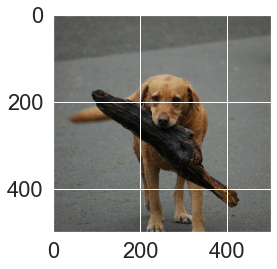

In [29]:
# Indice 4

print('Label: ',y_vals[4])

print('Nombre: ',images_name[4])

img = imio.imread('./data/train/'+images_name[4]+'.jpg')
plt.imshow(img)


In [30]:
# train-test split
np.random.seed(59)
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices =np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

### Implementa tu codigo de  K-Neighbors aqui:

El siguiente es un ejemplo de como puedes  definir tu función para predecir la raza sobre un punto x_predict ,a través de uscar los "k" vecinos mas cercanos en X_train y devolver como predicción el "y" que mas se repite(la moda) correspondiente a esos "k" valores de X_train , este "y" estará dado por Y_train.

Un ejemplo  de KNN en tensorflow: http://marubon-ds.blogspot.com/2017/09/knn-k-nearest-neighbors-by-tensorflow.html (este tiene diferencias, usar como guía no copiar literal, por ejemplo este usa una métrica de distancia diferente a la que debemos usar: distancia euclidiana )


#### Instrucciones:
1. Implementar KNN
2. Agregar el grafo de tensorboard
3. Ejecutar el modelo con las 2 imagenes de prueba.

In [31]:
def predecir_raza_KNN(x_predict,X_train,Y_train,k):
    y = None
    
    feature_number = len(x_vals_train[0])

    k = 5
    tf.compat.v1.disable_eager_execution()

    x_data_train = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, feature_number])
    y_data_train = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, len(y_vals[0])])
    x_data_test = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, feature_number])


    distance = np.sqrt(np.sum(np.square(x_predict-x_vals)))

    _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
    top_k_label = tf.gather(y_data_train, top_k_indices)

    sum_up_predictions = tf.reduce_sum(top_k_label, axis=[1])
    prediction = tf.argmax(sum_up_predictions, axis=1)
    
    
    
    
    
    #
    return y #asigna a "y" la predicción resulatnte

In [32]:
sess = tf.compat.v1.Session()
prediction_outcome = sess.run(prediction, feed_dict={x_data_train: x_vals_train,
                               x_data_test: x_vals_test,
                               y_data_train: y_vals_train})

# evaluation
accuracy = 0
for pred, actual in zip(prediction_outcome, y_vals_test):
    if pred == np.argmax(actual):
        accuracy += 1

print(accuracy / len(prediction_outcome))

NameError: name 'y' is not defined

In [33]:
predict_image = test_features[0]
predecir_raza_KNN(predict_image,x_vals_train,y_vals_train, 5)

NameError: name 'test_features' is not defined

## Probamos el algoritmo con nuevas imagenes 

Como buena practica luego de entrenar nuestro algoritmo, lo probamos con imagenes que no ha visto antes 

In [34]:
test_features = np.load('./data/test/test_inception_features_array.npy')

### Prueba 1

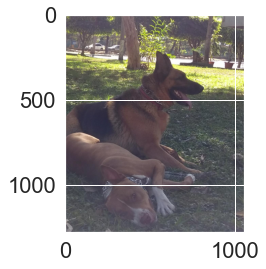

In [35]:
img_test = imio.imread('./data/test/test1.jpg')
plt.imshow(img_test)

In [116]:
sess = tf.compat.v1.Session()

In [1]:
predict_image = test_features[0]
predecir_raza_KNN(predict_image,x_vals_train,y_vals_train, 5)
## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: german_shepherd

### Prueba 2

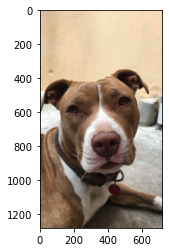

In [13]:
img_test = imio.imread('./data/test/test2.jpg')
plt.imshow(img_test)

In [14]:
## Ejecuta tu modelo con la entrada de `predict_image`
# Deberiamos obtener: american_staffordshire_terrier #
predict_image = test_features[1]
